In [41]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Path: src\notebooks\statics.ipynb

In [2]:
print(os.getcwd())
os.chdir("../../data/raw")
data_source_path = os.getcwd()
print(data_source_path)

e:\Project\THAI-MNIST\src\notebooks
e:\Project\THAI-MNIST\data\raw


In [74]:
class numericData:
    def __init__(self, path) -> None:
        self.path = path
        self.num_class = len(os.listdir(self.path))
        self.Class = list(os.listdir(self.path))
        self.each_class = self.count_inside_class()
        self.dataFrame = pd.DataFrame({"Class": self.Class, "Count": self.each_class})
        self.all_count = sum(self.each_class)

    @classmethod
    def get_path(self):
        return self.path

    def show_data(self):
        print(f"Number of class: {self.num_class}")
        print(f"Class: {self.Class}")

    def count_inside_class(self):
        count = []
        for i in self.Class:
            count.append(len(os.listdir(os.path.join(self.path, i))))
        self.each_class = count
        return count

In [77]:
def convert_to_thai(number):
    thai_alphabets = "กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮฦ"
    if number < 0 or number > 43:
        return "Invalid input"
    else:
        return thai_alphabets[number]

In [78]:
data = numericData(data_source_path)
df = data.dataFrame
df["Class"] = df["Class"].astype(int)

# sort by class
df = df.sort_values(by=["Class"])
df["thai"] = df["Class"].apply(convert_to_thai)

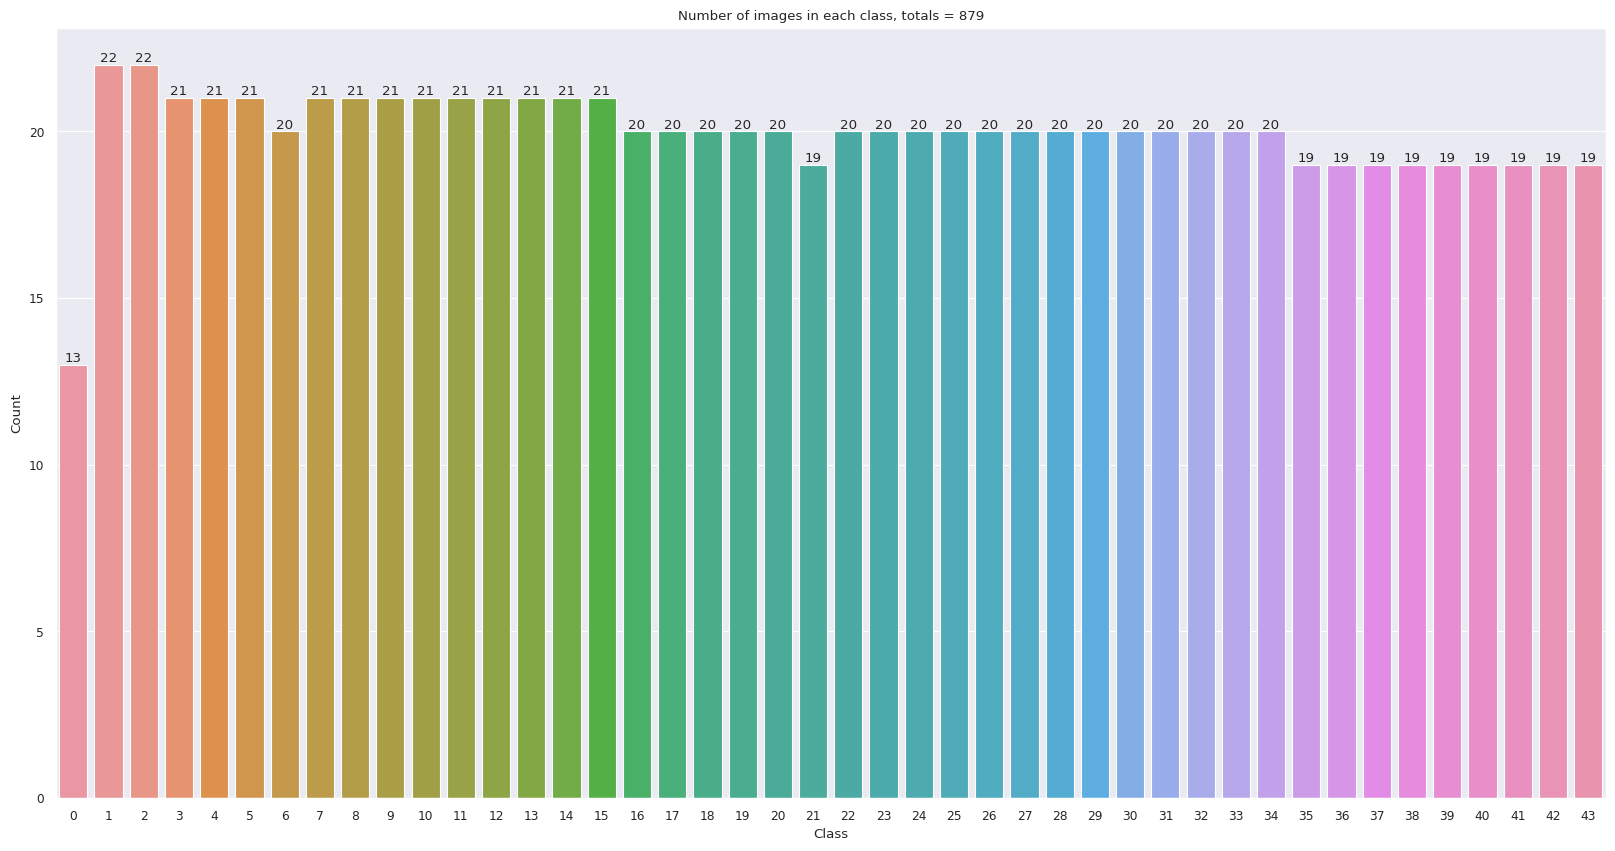

In [94]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df, y=df["Count"], x=df["Class"])
ax.set_title(f"Number of images in each class, totals = {data.all_count}")
sns.set_context("paper")
for i in ax.containers:
    ax.bar_label(
        i,
    )